Программа на сегодня:

1. Функции минимума, максимума, скользящее среднее
2. Гистограмма, квантиль
3. Корреляция параметров
4. Автокорреляция, сезонность
5. Тренд

ДЗ 2: рассмотреть данные по следующей ссылке изученными методами. Написать отчет, в котором должны содержаться следующие пункты:

1) какие выводы можно сделать по данным,

2) какие методы из изученных применимы, какие не применимы для данного датасета и почему.

**Это ДЗ конкурсное, будет выбрано 3 победителя**.

Критерий оценки: детальность отчета.

* ссылка на данные для ДЗ (источник: [Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)):

https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true


* ссылка на данные о погоде в Москве за 5 лет (источник: [rp5.ru](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5))):

https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true

Ссылка на запись трансляции:
https://live.skillbox.ru/webinars/code/uchimsya-issledovat-dannye271020/

ДЗ сдается в виде ссылки на файл, аналогичный этому, через Google Форму в Telegram чате.

**Дедлайн:** 17:00 по МСК


# Инструкция по отправке ДЗ

Схема: Вы выполняете ДЗ в своем файле на Google Диск (можно скопировать этот или создать новый). После чего открываете доступ на чтение по ссылке и отправляете ссылку в Google Форму, которая закреплена в Telegram чате. Файлы без доступа на чтение проверить не получится.





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = 'https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true'
data = pd.read_excel(path, skiprows=6)  # Подгружаем данные, удалив первые 6 строк с комментариями
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,01.01.2020 21:00,-1.9,745.5,760.4,0.3,83.0,"Ветер, дующий с запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,0.0,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-4.5,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,01.01.2020 18:00,-3.0,745.2,760.2,1.4,77.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.5,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,01.01.2020 15:00,-2.3,743.8,758.8,1.4,71.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,50%.,Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-6.9,NaN,NaN,NaN,NaN,NaN,NaN
3,01.01.2020 12:00,-2.0,742.4,757.3,3.4,66.0,"Ветер, дующий с севера",3,NaN,11.0,"90 или более, но не 100%",Облака в целом образовывались или развивались.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,01.01.2020 09:00,0.0,739.0,753.7,3.6,85.0,"Ветер, дующий с северо-северо-запада",3,NaN,10.0,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,-0.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-2.3,0.9,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN
17643,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN
17644,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN
17645,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Создадим новую колонку с датами в правильном типе

data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

# Данные даны задом наперед, метеослужба вначале держит новые записи, а потом старые
# Из-за этого когда мы завтра будем строить тренд, он нарисуется "в прошлое", а в будущее
# Отсортируем данные в правильном порядке
data = data.sort_values('date')  # Отсортировать данные по колонке date ПО ВОЗРАСТАНИЮ (обновили перемнную data)
# При сортировке развернулся индекс - сбросим его
# data.reset_index()  # новый объект
data = data.reset_index() # индекс идет правильно от 0 до 1

In [ ]:
data

,index,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
0,17646,01.01.2015 00:00,-6.6,743.2,758.4,-0.7,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Морось (незамерзающая) или снежные зерна нелив...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,NaN,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00
1,17645,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:00:00
2,17644,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00
3,17643,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 03:00:00
4,17642,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,4,01.01.2020 09:00,0.0,739.0,753.7,3.6,85.0,"Ветер, дующий с северо-северо-запада",3,NaN,10.0,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,-0.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-2.3,0.9,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,1,2020-01-01 09:00:00
17643,3,01.01.2020 12:00,-2.0,742.4,757.3,3.4,66.0,"Ветер, дующий с севера",3,NaN,11.0,"90 или более, но не 100%",Облака в целом образовывались или развивались.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 12:00:00
17644,2,01.01.2020 15:00,-2.3,743.8,758.8,1.4,71.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,50%.,Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 15:00:00
17645,1,01.01.2020 18:00,-3.0,745.2,760.2,1.4,77.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.5,Следы осадков,12.0,NaN,NaN,NaN,NaN,2020-01-01 18:00:00


In [ ]:
# Необязательное дз (не проверяется, для проверки, что у вас все работает)
# Выведите график температуры с 1 июля 2016 по 9 сентября 2018 года
# (достаточно скомбинировать код, который демонтрировался на вебинаре, но есть и много других методов на ваш выбор)

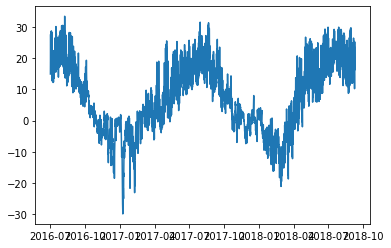

In [ ]:
start_date = pd.Timestamp(day=1, month=7, year=2016)
end_date = pd.Timestamp(day=9, month=9, year=2018)

# Способ 1: создать дополнительную таблицу с промежуточными значениями
condition1 = data['date'] > start_date
data1 = data[condition1]
condition2 = data1['date'] < end_date
data2 = data1[condition2]
x = data2['date']
y = data2['T']
plt.plot(x, y)

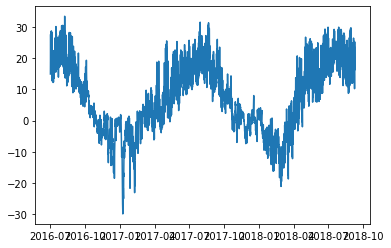

In [ ]:
# Способ 2:
# комбинирование условий с помощью оператора &
data3 = data[condition1 & condition2]

x = data3['date']
y = data3['T']
plt.plot(x, y)

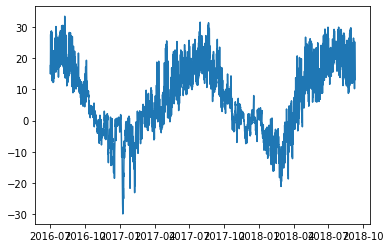

In [ ]:
# Способ 3:
# оператор between
data4 = data[data['date'].between(start_date, end_date)]

x = data4['date']
y = data4['T']
plt.plot(x, y)

In [ ]:
# Min, max, rolling mean

In [ ]:
data['T'].min(), data['T'].max(), data['T'].mean(), 

(-29.9, 33.4, 6.898101660338873)

In [ ]:
data['Tmin'] = data['T'].min()  # одно значение размножится на всю колонку
data['Tmax'] = data['T'].max()  # одно значение размножится на всю колонку
data['Tmean'] = data['T'].mean()  # одно значение размножится на всю колонку
data['Tmin']

0       -29.9
1       -29.9
2       -29.9
3       -29.9
4       -29.9
         ... 
17642   -29.9
17643   -29.9
17644   -29.9
17645   -29.9
17646   -29.9
Name: Tmin, Length: 17647, dtype: float64

In [ ]:
data

,index,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,Tmin,Tmax,Tmean
0,17646,01.01.2015 00:00,-6.6,743.2,758.4,-0.7,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Морось (незамерзающая) или снежные зерна нелив...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,NaN,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,-29.9,33.4,6.898102
1,17645,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:00:00,-29.9,33.4,6.898102
2,17644,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00,-29.9,33.4,6.898102
3,17643,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 03:00:00,-29.9,33.4,6.898102
4,17642,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 04:00:00,-29.9,33.4,6.898102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,4,01.01.2020 09:00,0.0,739.0,753.7,3.6,85.0,"Ветер, дующий с северо-северо-запада",3,NaN,10.0,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,-0.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-2.3,0.9,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,1,2020-01-01 09:00:00,-29.9,33.4,6.898102
17643,3,01.01.2020 12:00,-2.0,742.4,757.3,3.4,66.0,"Ветер, дующий с севера",3,NaN,11.0,"90 или более, но не 100%",Облака в целом образовывались или развивались.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 12:00:00,-29.9,33.4,6.898102
17644,2,01.01.2020 15:00,-2.3,743.8,758.8,1.4,71.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,50%.,Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 15:00:00,-29.9,33.4,6.898102
17645,1,01.01.2020 18:00,-3.0,745.2,760.2,1.4,77.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.5,Следы осадков,12.0,NaN,NaN,NaN,NaN,2020-01-01 18:00:00,-29.9,33.4,6.898102


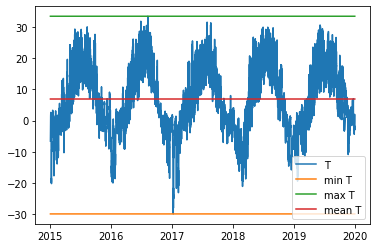

In [ ]:
x = data['date']
plt.plot(x, data['T'], label='T')
plt.plot(x, data['Tmin'], label='min T')
plt.plot(x, data['Tmax'], label='max T')
plt.plot(x, data['Tmean'], label='mean T')
plt.legend()

In [ ]:
data['T'].rolling(4).mean()  # Первые 3 значения NaN (not a number) = None - т.к. у нас окно шириной 4,
# то для первых 3-х записей мы ничего не можем нарисовать

0          NaN
1          NaN
2          NaN
3       -6.050
4       -5.675
         ...  
17642    1.075
17643    0.150
17644   -0.825
17645   -1.825
17646   -2.300
Name: T, Length: 17647, dtype: float64

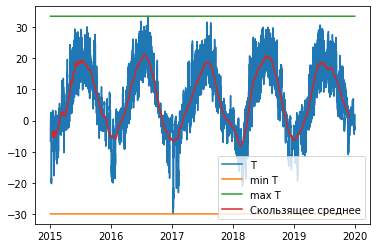

In [ ]:
x = data['date']
plt.plot(x, data['T'], label='T')
plt.plot(x, data['Tmin'], label='min T')
plt.plot(x, data['Tmax'], label='max T')
plt.plot(x, data['T'].rolling(500, center=True).mean(), label='Скользящее среднее')
plt.legend()

In [ ]:
# Гистограмма и квантили
# Гистограмма - график, который показывает для каждого значения, сколько раз оно встретилось

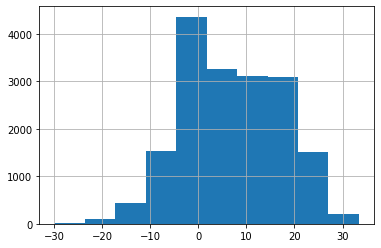

In [ ]:
data['T'].hist()

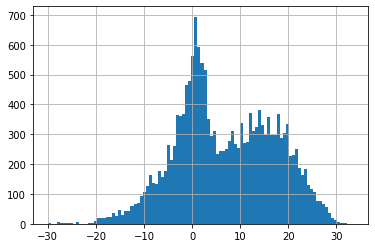

In [ ]:
data['T'].hist(bins=100)

In [ ]:
# 95-й квантиль равен 23.3 градусам = с вероятностью 95% температура не превысит 23 градусов
# (вероятностное ограничение данных сверху)

In [ ]:
data['T'].quantile(0.95)

23.3

In [ ]:
data['T'].quantile(0.99)

27.3

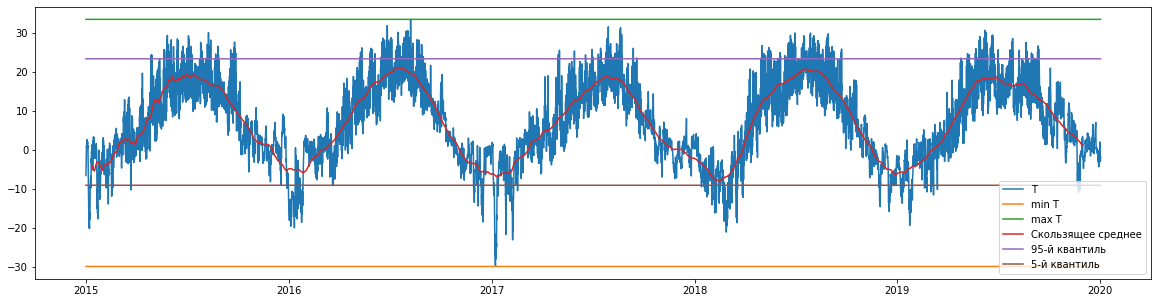

In [ ]:
data['quantile_95'] = data['T'].quantile(0.95)
data['quantile_05'] = data['T'].quantile(0.05)

plt.figure(figsize=(20, 5))
x = data['date']
plt.plot(x, data['T'], label='T')
plt.plot(x, data['Tmin'], label='min T')
plt.plot(x, data['Tmax'], label='max T')
plt.plot(x, data['T'].rolling(500, center=True).mean(), label='Скользящее среднее')
plt.plot(x, data['quantile_95'], label='95-й квантиль')
plt.plot(x, data['quantile_05'], label='5-й квантиль')
plt.legend()

In [ ]:
# Корреляция и автокорреляция параметров
# Корреляция - величина, которая показывает, насколько движение рядов связано (синхронно ли убывают и возрастают)

In [ ]:
data.corr()  # число e-02 = число * 10(в степени -1)

,index,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg,Tmin,Tmax,Tmean,quantile_95,quantile_05
index,1.000000,-9.635390e-02,-3.671883e-02,-2.952649e-02,2.100743e-03,-3.924883e-03,7.940044e-02,5.551955e-02,9.528187e-02,-7.540250e-02,-5.994095e-02,-9.637402e-03,-1.162447e-01,-1.552581e-02,-7.256078e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
T,-0.096354,1.000000e+00,-1.032071e-01,-1.717514e-01,-7.827320e-02,-4.529774e-01,-9.293888e-02,-4.119141e-02,-6.041121e-02,9.666981e-01,9.810994e-01,2.862612e-01,8.750245e-01,8.014641e-03,8.474177e-01,-2.422590e-15,-2.324718e-15,4.754477e-16,-8.833912e-16,-1.675718e-16
Po,-0.036719,-1.032071e-01,1.000000e+00,9.975197e-01,5.843258e-02,-1.970844e-01,-9.651331e-02,-1.454744e-01,5.442084e-03,-1.525757e-01,-8.366738e-02,2.294065e-01,-2.146700e-01,-1.714788e-02,-1.816800e-01,3.140342e-15,-7.362333e-15,3.585735e-15,6.265163e-15,3.308781e-15
P,-0.029526,-1.717514e-01,9.975197e-01,1.000000e+00,6.189174e-02,-1.655914e-01,-8.843297e-02,-1.410348e-01,9.029624e-03,-2.180096e-01,-1.524789e-01,2.080658e-01,-2.745478e-01,-1.754106e-02,-2.245611e-01,1.073749e-13,-1.041379e-13,1.059368e-13,1.063750e-13,1.064101e-13
Pa,0.002101,-7.827320e-02,5.843258e-02,6.189174e-02,1.000000e+00,9.410837e-02,6.252739e-02,1.696942e-01,2.369476e-01,2.340843e-02,8.991973e-02,-5.975262e-03,-1.899463e-02,-3.377637e-02,-5.504336e-02,2.598972e-16,-8.319655e-17,7.003750e-17,-8.148388e-18,2.477805e-17
U,-0.003925,-4.529774e-01,-1.970844e-01,-1.655914e-01,9.410837e-02,1.000000e+00,-2.185844e-01,1.906627e-02,-6.254246e-02,-1.899082e-01,-3.737217e-01,-6.516704e-01,2.452576e-02,1.370969e-02,-7.124799e-03,8.658274e-15,-9.343158e-15,-5.390364e-15,4.460144e-15,-1.260595e-14
Ff,0.079400,-9.293888e-02,-9.651331e-02,-8.843297e-02,6.252739e-02,-2.185844e-01,1.000000e+00,5.095884e-01,3.341224e-01,-1.101995e-01,-3.591037e-01,1.234473e-01,-2.207968e-01,-1.380542e-03,-9.720958e-02,-1.924923e-15,7.727938e-15,-3.547952e-15,-8.442449e-15,-9.809141e-15
ff10,0.055520,-4.119141e-02,-1.454744e-01,-1.410348e-01,1.696942e-01,1.906627e-02,5.095884e-01,1.000000e+00,5.592780e-01,1.194789e-01,1.382758e-01,-7.695367e-02,-3.780686e-02,NaN,NaN,5.961139e-16,-6.736904e-16,6.736904e-16,6.736904e-16,6.736904e-16
ff3,0.095282,-6.041121e-02,5.442084e-03,9.029624e-03,2.369476e-01,-6.254246e-02,3.341224e-01,5.592780e-01,1.000000e+00,-1.526538e-01,2.645728e-02,2.949647e-02,-8.851896e-02,NaN,-1.056363e-01,-8.419427e-16,-8.419427e-16,-8.419427e-16,-4.737579e-16,-1.050507e-16
Tn,-0.075402,9.666981e-01,-1.525757e-01,-2.180096e-01,2.340843e-02,-1.899082e-01,-1.101995e-01,1.194789e-01,-1.526538e-01,1.000000e+00,NaN,1.090687e-01,9.658994e-01,NaN,9.678649e-01,-1.948079e-16,-2.757680e-17,6.623886e-17,5.469793e-16,1.696526e-16


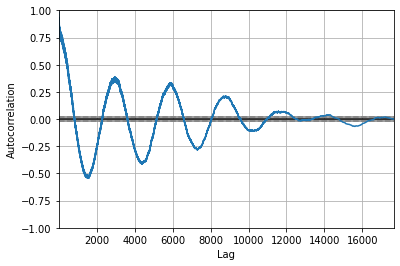

In [ ]:
pd.plotting.autocorrelation_plot(data['T'])

In [ ]:
data_short = data[data['date'].dt.hour == 12]  # Оставляем только замеры в полдень

In [ ]:
data_short

,index,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,Tmin,Tmax,Tmean,quantile_95,quantile_05
12,17634,01.01.2015 12:00,-1.5,743.6,758.5,0.2,96.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,"90 или более, но не 100%",Снег с перерывами слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",70 – 80%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 12:00:00,-29.9,33.4,6.898102,23.3,-9.1
36,17610,02.01.2015 12:00,1.5,737.6,752.2,-0.5,97.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02 12:00:00,-29.9,33.4,6.898102,23.3,-9.1
60,17586,03.01.2015 12:00,2.4,726.1,740.4,0.6,89.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,4.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-03 12:00:00,-29.9,33.4,6.898102,23.3,-9.1
84,17562,04.01.2015 12:00,0.8,722.2,736.5,0.2,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Ливневый снег слабый в срок наблюдения или за ...,Ливень (ливни).,Снег или дождь со снегом.,NaN,NaN,Кучево-дождевые волокнистые (часто с наковальн...,100%.,300-600,NaN,NaN,4.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-04 12:00:00,-29.9,33.4,6.898102,23.3,-9.1
108,17538,05.01.2015 12:00,-8.5,733.3,748.4,1.2,79.0,"Ветер, дующий с северо-запада",3,NaN,NaN,100%.,Снег с перерывами слабый в срок наблюдения.,Снег или дождь со снегом.,Песчаная или пыльная буря или снежная низовая ...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевые, просвечивающие или плотные в дв...",NaN,4.0,-11.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-05 12:00:00,-29.9,33.4,6.898102,23.3,-9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,35,28.12.2019 12:00,-0.7,751.6,766.6,1.5,91.0,"Ветер, дующий с северо-востока",2,NaN,NaN,100%.,Дымка. Диаметр отложения при гололеде составл...,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-28 12:00:00,-29.9,33.4,6.898102,23.3,-9.1
17619,27,29.12.2019 12:00,-3.6,759.3,774.6,0.5,88.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,NaN,NaN,4.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 12:00:00,-29.9,33.4,6.898102,23.3,-9.1
17627,19,30.12.2019 12:00,-3.4,748.6,763.7,-3.3,84.0,"Ветер, дующий с юго-запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-5.8,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-30 12:00:00,-29.9,33.4,6.898102,23.3,-9.1
17635,11,31.12.2019 12:00,1.4,731.2,745.7,-0.6,92.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,4.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31 12:00:00,-29.9,33.4,6.898102,23.3,-9.1


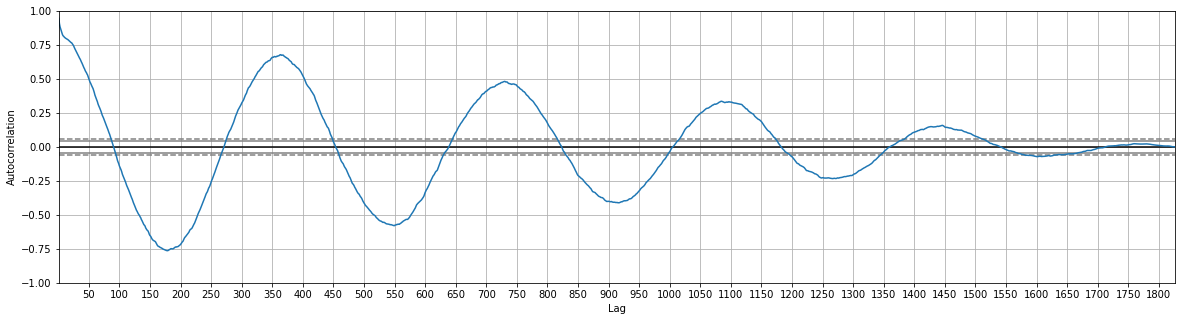

In [ ]:
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data_short['T'])
plt.locator_params(axis='x', nbins=50)
# Визуализируем годовую сезонность в 365 дней

In [ ]:
# Тренд (используем линейную регрессию)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()  # создаем новый пустой регрессор

X = pd.DataFrame(data.index)  # Нужна на вход двумерная таблица - создаем ее просто из номеров строк
Y = data['T']

In [ ]:
model.fit(X, Y)  # обучаем модель

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
results = model.predict(X)  # "предсказываем" линейную зависимость

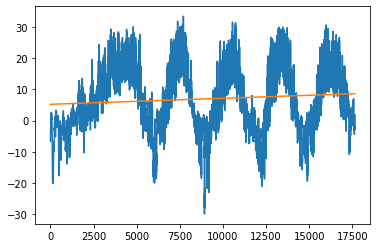

In [ ]:
x = data.index
y = data['T']

plt.plot(x, y)
plt.plot(x, results)

In [ ]:
results

array([5.19528664, 5.19547964, 5.19567264, ..., 8.60053068, 8.60072368,
       8.60091668])

In [ ]:
import numpy as np # библиотека инструменты для математики
arr = np.array([1, 2, 3, 4])  # можно делать мат операции над массивами

array([1, 2, 3, 4])

In [ ]:
arr 